# Plotting parametric geometry

In [24]:
!pwd

/home/hell/Desktop/PhD/PhD work/PINNs/10. June 2022/3. Week 3/Sunbird transfer/Modulus_my_examples/2D_heat_conduction/14. Parametric geometry with modified Fourier + adaptive activation+ importance sampling+quasirandom


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata # interpolation
from mpl_toolkits.mplot3d import Axes3D # for 3D if needed
from matplotlib import cm # colormap
from matplotlib import ticker # controls number of ticks in colorbar, helpful for very ugly unsymmetric colorbar

In [26]:
data = np.load('outputs/2D_heat_conduction/inferencers/inf_data.npz',allow_pickle=True)

In [27]:
key = list(data.keys())
key

['arr_0']

In [28]:
dictin = data[key[0]]
type(dictin), dictin

(numpy.ndarray,
 array({'x': array([[-0.5],
        [-0.5],
        [-0.5],
        ...,
        [ 0.5],
        [ 0.5],
        [ 0.5]], dtype=float32), 'y': array([[0.        ],
        [0.01265823],
        [0.02531646],
        ...,
        [1.0234177 ],
        [1.0367088 ],
        [1.05      ]], dtype=float32), 'L': array([[1.  ],
        [1.  ],
        [1.  ],
        ...,
        [1.05],
        [1.05],
        [1.05]], dtype=float32), 'T': array([[0.47841576],
        [0.48610675],
        [0.4935822 ],
        ...,
        [0.5026139 ],
        [0.49546432],
        [0.48885924]], dtype=float32)}, dtype=object))

In [29]:
# how to access this numpy array?
# there is a dictionary built inside the numpy array
# https://stackoverflow.com/a/37949466/14598633
data =  dictin[()]
keys = list(data.keys())

In [30]:
keys

['x', 'y', 'L', 'T']

In [31]:
x_array, y_array, k_array, best_u_pred = data[keys[0]], data[keys[1]], data[keys[2]], data[keys[3]]

In [32]:
# just an array to store x, y for griddata interpolation
nodes_deepxde = np.hstack([x_array, y_array])

In [33]:
nodes_deepxde

array([[-0.5       ,  0.        ],
       [-0.5       ,  0.01265823],
       [-0.5       ,  0.02531646],
       ...,
       [ 0.5       ,  1.0234177 ],
       [ 0.5       ,  1.0367088 ],
       [ 0.5       ,  1.05      ]], dtype=float32)

In [34]:
first_file = np.load('true_solution/final_data_1.01.npz')
second_file = np.load('true_solution/final_data_1.03.npz')
third_file = np.load('true_solution/final_data_1.05.npz')
list(first_file.keys())

['nodes', 'temperature']

In [35]:
nodes_first = first_file['nodes']
nodes_second = second_file['nodes']
nodes_third = third_file['nodes']
first_true = first_file['temperature']
second_true = second_file['temperature']
third_true = third_file['temperature']

In [36]:
np.shape(nodes_first), np.shape(first_true)

((5704, 2), (5704, 1))

In [37]:
ub = [x_array.max(), y_array.max()]
lb = [x_array.min(), y_array.min()]
print(ub)
print(lb)
n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
#X, Y = np.meshgrid(x,y)

[0.5, 1.05]
[-0.5, 0.0]


In [38]:
# a function to search for index
def return_indices(lower_limit_k, upper_limit_k, k):
    # returns indices for k (conductivity) between lower_limit_k and upper_limit_k
    indices = []
    for index,item in enumerate(k):
        if upper_limit_k>item>lower_limit_k:
            indices.append(index)
    # move out of the function to see the plot 
    #print(np.shape(indices))
    #plt.plot(k[indices])
    return indices

In [39]:
np.unique(k_array)

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05], dtype=float32)

/tmp/ipykernel_69837/3020974545.py:20: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_under('k')
/tmp/ipykernel_69837/3020974545.py:21: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_over('k')


(0.0, 1.051)

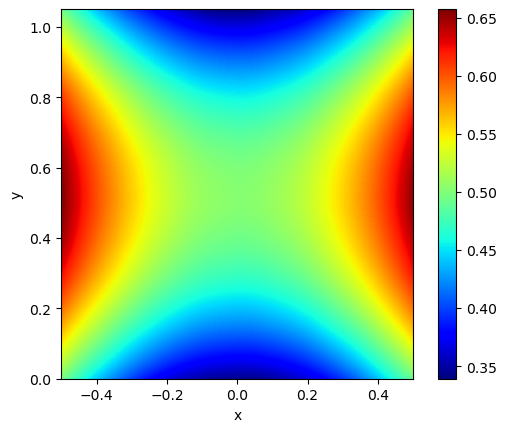

In [40]:
# trying to plot 1 plot
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)#, projection='3d')
n_points = 1000
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
upper_limit = 1.051
lower_limit = 1.041
# Create meshgrid
indices = return_indices(lower_limit_k = lower_limit, upper_limit_k=upper_limit, k=k_array)
X, Y = np.meshgrid(x,y)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
sc = ax.imshow(new_data, interpolation='nearest', cmap='jet', 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal')#,vmin=0, vmax=1)

#sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
plt.colorbar(sc)
sc.cmap.set_under('k')
sc.cmap.set_over('k')
plt.xlabel('x')
plt.ylabel('y')
ax.set_ylim([0, upper_limit])
#ax.set_zlabel('z')
#plt.title('Temperature distribution')
#plt.savefig('plots/Iteration_'+str(max_iter)+'_Best_PINN_predicted.jpg', dpi = 200)

### This is gradient explosion

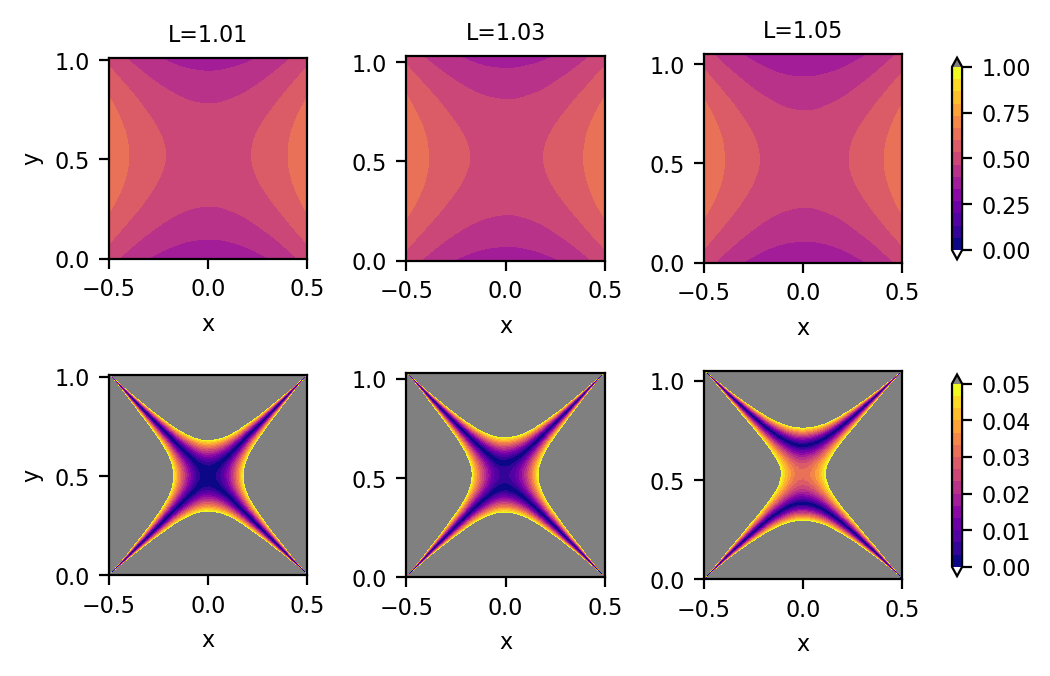

In [41]:
fig, ax = plt.subplots(2, 3,dpi=200)
#ax = fig.add_subplot(111)#, projection='3d')
n_points = 1000
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)
# PINN predictions
indices = return_indices(lower_limit_k = 1.005, upper_limit_k=1.011, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
sc1 =  ax[0,0].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)
ax[0,0].set_ylim([0, 1.01])
sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')

#indices = return_indices(lower_limit_k = 0.58, upper_limit_k=0.62, k=k_array)
new_data_1 = griddata(nodes_first, first_true.flatten(), (X, Y), method='linear')
sc2 =  ax[1,0].imshow(abs(new_data_1-new_data), interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)
ax[1,0].set_ylim([0, 1.01])
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')

indices = return_indices(lower_limit_k = 1.021, upper_limit_k=1.031, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
sc1 =  ax[0,1].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)
ax[0,1].set_ylim([0, 1.03])
sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')

#indices = return_indices(lower_limit_k = 0.88, upper_limit_k=0.92, k=k_array)
new_data_1 = griddata(nodes_second, second_true.flatten(), (X, Y), method='linear')
sc2 =  ax[1,1].imshow(abs(new_data_1-new_data), interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)
ax[1,1].set_ylim([0, 1.03])
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')

indices = return_indices(lower_limit_k = 1.044, upper_limit_k=1.0511, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
sc1 =  ax[0,2].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)
ax[0,2].set_ylim([0, 1.05])
sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')

#indices = return_indices(lower_limit_k = 0.96, upper_limit_k=1.0, k=k_array)
new_data_1 = griddata(nodes_third, third_true.flatten(), (X, Y), method='linear')
sc2 =  ax[1,2].imshow(abs(new_data_1-new_data), interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)
ax[1,2].set_ylim([0, 1.05])
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')


#sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
#plt.colorbar(sc)
# setting color bounds on PINN predictions only
sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')

#  setting axis labels and size
ax[0,0].set(xlabel='x', ylabel='y')
# big axis lebel looks ugly, defauly is 10, I set it to 8. see this: https://stackoverflow.com/a/46651121/14598633
ax[0,0].xaxis.label.set_size(8)
ax[0,0].yaxis.label.set_size(8)
#ax[0,0].set_xticks([])
ax[0,1].set(xlabel='x', ylabel='')
ax[0,1].xaxis.label.set_size(8)
ax[0,1].yaxis.label.set_size(8)
#ax[0,1].set_xticks([])
#ax[0,1].set_yticks([])
ax[0,2].set(xlabel='x', ylabel='')
ax[0,2].xaxis.label.set_size(8)
ax[0,2].yaxis.label.set_size(8)
#ax[0,2].set_xticks([])
#ax[0,2].set_yticks([])
ax[1,0].set(xlabel='x', ylabel='y')
ax[1,0].xaxis.label.set_size(8)
ax[1,0].yaxis.label.set_size(8)
ax[1,1].set(xlabel='x', ylabel='')
ax[1,1].xaxis.label.set_size(8)
ax[1,1].yaxis.label.set_size(8)
#ax[1,1].set_yticks([])
ax[1,2].set(xlabel='x', ylabel='')
ax[1,2].xaxis.label.set_size(8)
ax[1,2].yaxis.label.set_size(8)
#ax[1,2].set_yticks([])
#ax[1,2].tick_params(axis='x', labelsize= 5)

# Setting title
ax[0,0].set_title('L=1.01',fontsize=8)
ax[0,1].set_title('L=1.03',fontsize=8)
ax[0,2].set_title('L=1.05',fontsize=8)
# ax[1,0].set_title('L=1.03',fontsize=8)
# ax[1,1].set_title('L=1.04',fontsize=8)
# ax[1,2].set_title('L=1.05',fontsize=8)

# tight layout is mostly good but not here. Plots becomes too small to see anything.
#fig.tight_layout()

# see this for tick label [numbers on axis] adjustment: https://stackoverflow.com/a/11386056/14598633
# default is 10
for col in range(3):
    for row in range(2):
        ax[row, col].tick_params(axis='both', which='major', labelsize=8)


# This one is better than tight_layout
# adjust width and height:https://stackoverflow.com/a/6541454/14598633
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.25   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=bottom, right=None, top=None, wspace=wspace, hspace=hspace)

# for customised colormaps, see: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html
cbar1 = fig.colorbar(sc1, ax=[ax[0,0],ax[0,1],ax[0,2]], shrink=0.7, extend="both")
cbar1.ax.tick_params(labelsize=8) # colorbar label size
cbar2 = fig.colorbar(sc2, ax=[ax[1,0],ax[1,1],ax[1,2]], shrink=0.7,extend="both")
cbar2.ax.tick_params(labelsize=8) # colorbar label size
#It turns out cbar2 looks very ugly with only 2 ticks, so to add more tick/bins, do the following.
tick_locator = ticker.MaxNLocator(nbins=6) # 6 bins comes from hit and trial. No rules
cbar2.locator = tick_locator
cbar2.update_ticks()

plt.savefig('plots/Iteration_PINN_predicted-subplot.jpg', dpi = 500,bbox_inches='tight',transparent=True)

In [42]:
# k=0.1
indices = return_indices(lower_limit_k = 1.005, upper_limit_k=1.011, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
new_data_1 = griddata(nodes_first, first_true.flatten(), (X, Y), method='linear')
# to ignore NANs
# https://datascience.stackexchange.com/a/11933

new_data = np.nan_to_num(new_data)
new_data_1 = np.nan_to_num(new_data_1)

rel_l2_norm_1 = np.linalg.norm(abs(new_data-new_data_1),2)/np.linalg.norm(new_data_1,2)
print("Data 1:",rel_l2_norm_1)
# K= 0.5
indices = return_indices(lower_limit_k = 1.021, upper_limit_k=1.031, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
new_data_1 = griddata(nodes_second, second_true.flatten(), (X, Y), method='linear')

new_data = np.nan_to_num(new_data)
new_data_1 = np.nan_to_num(new_data_1)

rel_l2_norm_2 = np.linalg.norm(abs(new_data-new_data_1),2)/np.linalg.norm(new_data_1,2)
print("Data 2:",rel_l2_norm_2)

indices = return_indices(lower_limit_k = 1.044, upper_limit_k=1.0511, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
new_data_1 = griddata(nodes_third, third_true.flatten(), (X, Y), method='linear')

new_data = np.nan_to_num(new_data)
new_data_1 = np.nan_to_num(new_data_1)

rel_l2_norm_3 = np.linalg.norm(abs(new_data-new_data_1),2)/np.linalg.norm(new_data_1,2)
print("Data 3:",rel_l2_norm_3)

average_L2_error = (rel_l2_norm_1 + rel_l2_norm_2 + rel_l2_norm_3)/3
print("average",average_L2_error)


Data 1: 0.3119513265498263
Data 2: 0.30980362734744615
Data 3: 0.30400383442314344
average 0.30858626277347195
